<a href="https://colab.research.google.com/github/kjamison/brainmontageplot/blob/main/brainmontageplot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#may need to restart the runtime and run again after the first time this installs new packages
!pip install git+https://github.com/kjamison/brainmontageplot.git

import numpy as np
from brainmontage import create_montage_figure, save_image
from matplotlib import pyplot as plt


CPU times: user 1.77 s, sys: 260 ms, total: 2.03 s
Wall time: 2.04 s


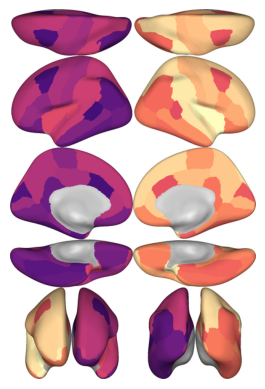

In [3]:
%%time

roivals=np.arange(86)+1 #example values for each ROI (1-numroi)

img=create_montage_figure(roivals,atlasname='fs86', 
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma')

save_image(img,'mydata_montage.png')
#or you can add outputimagefile='mydata_montage.png' to create_montage_figure() to save directly

plt.figure()
plt.imshow(img)
_=plt.axis('off')


Saved mydata_montage_withslices.png
CPU times: user 5.56 s, sys: 805 ms, total: 6.37 s
Wall time: 6.16 s


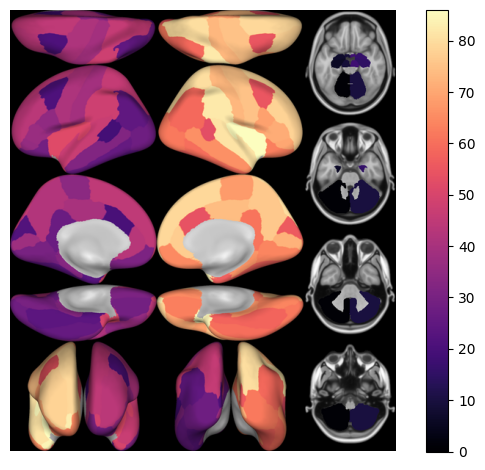

In [4]:
%%time
#create an image with surface views, upscaled to higher dpi (1 instead of 0.25), a vertical row of axial slices, with black background
img_with_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='all',surftype='infl',clim=[0,86],colormap='magma',
    slice_dict={'axial':[23,33,43,53]},mosaic_dict={'axial':[-1,1]},
    upscale_factor=1, backgroundcolor="black",
    outputimagefile='mydata_montage_withslices.png')


#Add a colorbar (to matplotlib figure)
#and save with plt.savefig()
plt.figure()
plt.imshow(img_with_slices,cmap='magma',vmin=0,vmax=86)
_=plt.axis('off')
plt.colorbar()
plt.tight_layout()
plt.savefig("mydata_montage_withslices_colorbar.png",dpi=200)

Saved mydata_montage_onlyslices.png
CPU times: user 4.08 s, sys: 343 ms, total: 4.42 s
Wall time: 4.31 s


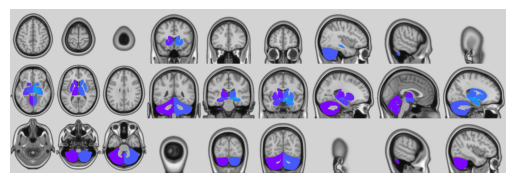

In [5]:
%%time
#Or an image with axial, coronal, and sagittal slices only, and a light gray background
img_slices=create_montage_figure(roivals,atlasname='fs86',
    viewnames='none',clim=[0,86],colormap='rainbow',
    slice_dict={'axial':range(0,180,20),'coronal':range(20,200,20),'sagittal':range(10,180,20)},
    backgroundcolor="lightgray",
    outputimagefile='mydata_montage_onlyslices.png')

plt.figure()
plt.imshow(img_slices)
_=plt.axis('off')
